In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist["data"], mnist["target"]

#code here
X = X[:2000]
Y = Y[:2000]

In [3]:
from sklearn.decomposition import PCA

X_copy = X
twoD_pca = PCA(n_components = 2)
twoD_pca.fit(X)
twoD_dataset = twoD_pca.transform(X)
twoD_pca.explained_variance_

array([339168.63495615, 252799.62045685])

In [4]:
images1 = twoD_pca.inverse_transform(twoD_dataset)[:10].reshape(10, 28, 28)

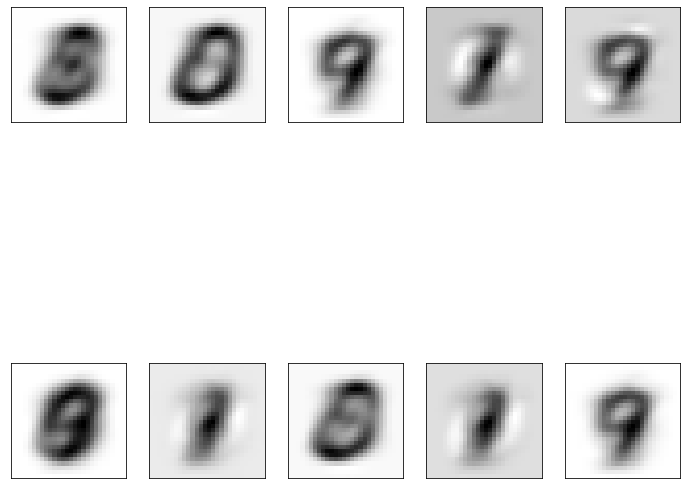

In [5]:
fig, ax = plt.subplots(2, 5, figsize = (12, 12))
for axi, i in zip(ax.flat, images1):
    axi.set(xticks=[], yticks=[])
    axi.imshow(i, interpolation='nearest', cmap=plt.cm.binary)

In [6]:
threeD_pca = PCA(n_components = 3)
threeD_pca.fit(X_copy)
threeD_dataset = threeD_pca.transform(X_copy)
threeD_pca.explained_variance_

array([339168.63496071, 252799.62085726, 219019.12948612])

In [7]:
images2 = threeD_pca.inverse_transform(threeD_dataset)[:10].reshape(10, 28, 28)

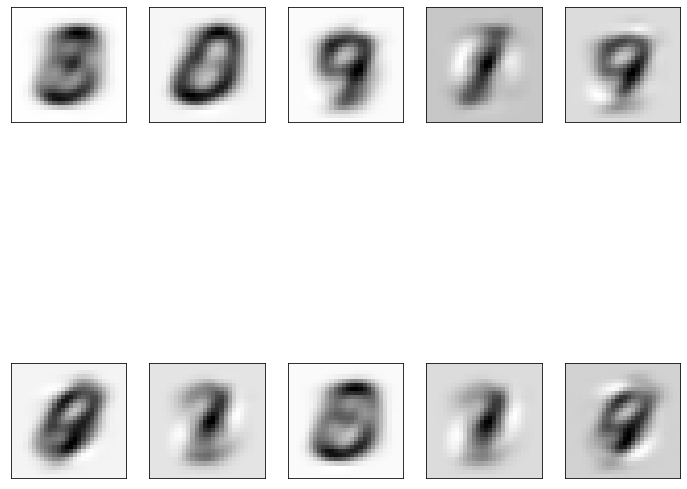

In [8]:
fig, ax = plt.subplots(2, 5, figsize = (12, 12))
for axi, i in zip(ax.flat, images2):
    axi.set(xticks=[], yticks=[])
    axi.imshow(i, interpolation='nearest', cmap=plt.cm.binary)

In [9]:
from sklearn.model_selection import train_test_split

X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(twoD_dataset, Y, test_size = 0.2)

In [10]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [11]:
clusters = [10, 16, 36, 64, 144, 256]
acc_list2D = []
for i in range(len(clusters)):
    kmeans = KMeans(n_clusters = clusters[i])
    kmeans.fit(X_train2D, y_train2D)
    pred = kmeans.predict(X_test2D)
    c_labels = infer_cluster_labels(kmeans, y_train2D.to_numpy(dtype = np.int64))
    p_labels = infer_data_labels(pred, c_labels)
    acc_list2D.append(accuracy_score(y_test2D.to_numpy(dtype = np.int64), p_labels))
print(acc_list2D)

[0.4225, 0.3675, 0.405, 0.405, 0.41, 0.3775]


In [12]:
X_train3D, X_test3D, y_train3D, y_test3D = train_test_split(threeD_dataset, Y, test_size = 0.2)

In [16]:
acc_list3D = []
for i in range(len(clusters)):
    kmeans = KMeans(n_clusters = clusters[i])
    kmeans.fit(X_train3D, y_train3D)
    pred = kmeans.predict(X_train3D)
    c_labels = infer_cluster_labels(kmeans, y_train3D.to_numpy(dtype = np.int64))
    p_labels = infer_data_labels(pred, c_labels)
    acc_list3D.append(accuracy_score(y_train3D.to_numpy(dtype = np.int64), p_labels))
print(acc_list3D)

[0.42, 0.4425, 0.49, 0.515625, 0.558125, 0.59625]


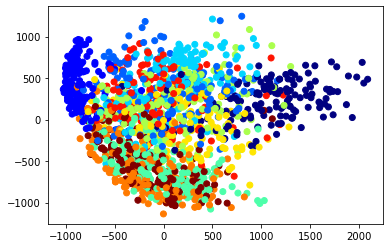

In [14]:
plt.scatter(X_train2D[:,0], X_train2D[:,1], c = y_train2D.to_numpy().astype(int), cmap = plt.cm.jet)

C:\Users\frank\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


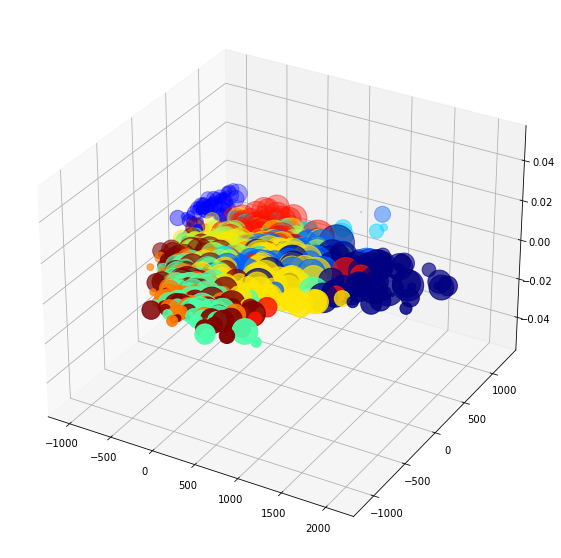

In [15]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

plt.scatter(X_train3D[:,0], X_train3D[:,1], X_train3D[:,2], c = y_train3D.to_numpy().astype(int), cmap = plt.cm.jet)